# Project Brief

### You are working as the chief data scientist at NITI Aayog, reporting to the CEO. The CEO has initiated a project wherein the NITI Aayog will provide top-level recommendations to the Chief Ministers (CMs) of various states, which will help them prioritise areas of development for their respective states. Since different states are in different phases of development, the recommendations should be specific to the states.

 

### The overall goal of this project is to help the CMs focus on areas that will foster economic development for their respective states. Since the most common measure of economic development is the GDP, you will analyse the GDP of the various states of India and suggest ways to improve it .

### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import warnings
warnings.filterwarnings("ignore")

# Part I-A:

## IMPORTING DATASET
### (Data I-A): This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.

In [2]:
State_wise_Gross_Domestic_Product = pd.read_csv(r'C:\\Users\\Paunikar\\Documents\\gdp me\\csv file folder\\State-wise Gross Domestic Product (GDP) at current Price on yearly basis.csv')
df1=State_wise_Gross_Domestic_Product 
df1.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


## Removing 2016-17 rows

In [3]:
# removing 2016-17 rows as most of the values are missing
df2 = df1.loc[df1.Duration != '2016-17']
df2.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


## Replacing spaces ("  ") with " _ "

In [4]:
#Replacing spaces ("  ") with " _ " for using columns names easily.
df1.columns = [c.replace(' ', '_') for c in df1.columns]
df2.columns = [c.replace(' ', '_') for c in df2.columns]

## Average growth of states only

In [5]:
average_growth = df2.loc[(df1.Items__Description == "(% Growth over previous year)")].mean(axis=0)
average_growth = average_growth.drop(["All_India_GDP","Jammu_&_Kashmir","Delhi","Chandigarh","Andaman_&_Nicobar_Islands","Puducherry"]).dropna() 
average_growth

Andhra_Pradesh_      12.632500
Arunachal_Pradesh    14.162500
Assam                11.877500
Bihar                13.765000
Chhattisgarh         13.352500
Goa                   2.020000
Gujarat              12.767500
Haryana              13.042500
Himachal_Pradesh     12.816667
Jharkhand            12.567500
Karnataka            14.230000
Kerala               12.752500
Madhya_Pradesh       14.647500
Maharashtra          12.103333
Manipur              11.890000
Meghalaya             7.667500
Mizoram              16.866667
Nagaland             15.953333
Odisha               10.712500
Punjab               11.346667
Rajasthan            11.940000
Sikkim               10.492500
Tamil_Nadu           12.712500
Telangana            12.497500
Tripura              15.613333
Uttar_Pradesh        12.367500
Uttarakhand          12.382500
dtype: float64

## Plotting graph average (% Growth over previous year)  v/s states

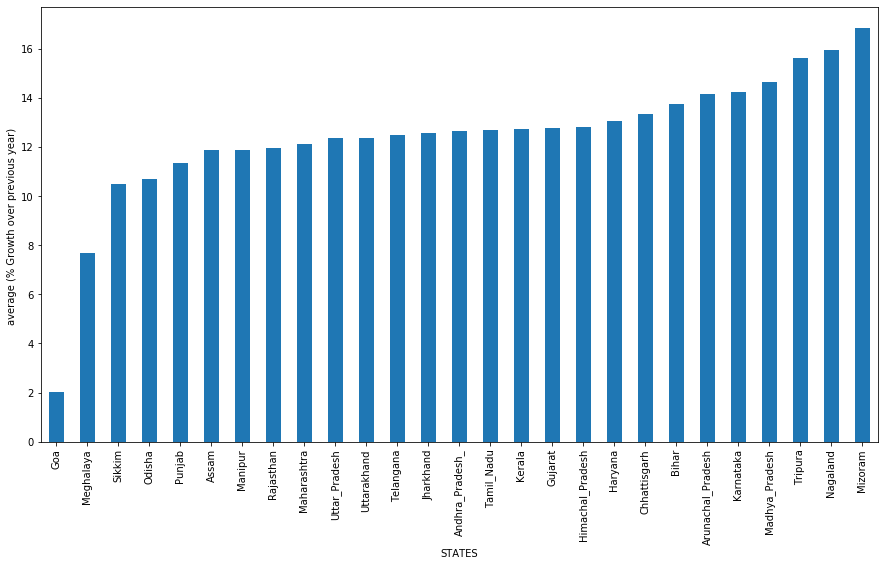

In [6]:
plt.rcParams["figure.figsize"] = [15,8]
average_growth.sort_values().plot.bar()
plt.ylabel('average (% Growth over previous year) ')
plt.xlabel('STATES')
plt.show()

## INSIGHTS :
States like Mizoram, Nagaland, Tripura are eastern side states their growth are significantly large. According to me these growth are due to increasing of tourism spots in these areas. Simillar to this Goa is famous for its tourism but its growth is not that significance. 
Karnataka GDP is also increasing due to presence of IT sector industries.
Meghalaya is mostly tribal area which affects its GDP.
Punjab is mostly depends on agriculture sector its GDP is not incresing considerably. According to me government should use better facilities to improve agriculture sector in punjab.

## Q. How will you compare the growth rates of any two states? 

#### For comparing the growth rate of any two states we make the bar graph having average (% Growth over previous year) on y-axis and states name on x-axis. By sorting the graph in ascending order we can compare the growth rates of any two states.

## Q. Which states have been growing consistently fast, and which ones have been struggling? 

#### Goa, Meghalaya, Sikkim, Odisha, Punjab have been struggling and       Mizoram, Nagaland, Tripura, Madhyapradesh, Karnataka are growing consistently fast

## Q.Rank top 3 fastest and 3 slowest-growing states? 

#### Top three fastest growing states are Mizoram, Nagaland, Tripura. Top three slowest growing states are Goa, Meghalaya, Sikkim.

## Q.What is the Nation's growth rate? 
#### 11.867500

## Q. What has been the growth rate of your home state, and how does it compare to the national growth rate?  

#### Uttar_Pradesh growth rate is 12.367500 which is more compare to national growth rate.

## Dropping (GSDP - CURRENT PRICES (` in Crore))

In [7]:
# dropping GSDP - CURRENT PRICES (` in Crore) rows because we dont need it now.
df3 = df2.loc[df2.Items__Description != 'GSDP - CURRENT PRICES (` in Crore)']

# Making dataframe of STATES & Years
df4=df3.drop(['Items__Description',"Duration"], axis = 1) 
df4.rename(index = { 6:0,7:1,8:2,9:3},inplace = True) 
data = {'Year':[2012,2013,2014,2015]} 
df5 = pd.DataFrame(data) 
YEARS = pd.concat([df4, df5],axis=1)

## YEARS datset consisting of "(% Growth over previous year)" and "years" for each state

In [8]:
YEARS

,Andhra_Pradesh_,Arunachal_Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,Himachal_Pradesh,Jammu_&_Kashmir,...,Tripura,Uttar_Pradesh,Uttarakhand,West_Bengal1,Andaman_&_Nicobar_Islands,Chandigarh,Delhi,Puducherry,All_India_GDP,Year
0,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,13.89,11.31,...,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86,2012
1,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,14.42,10.09,...,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97,2013
2,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,10.14,4.70,...,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65,2014
3,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,NaN,17.91,...,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99,2015


## Plotting "(% Growth over previous year)" V/S "years" for each state

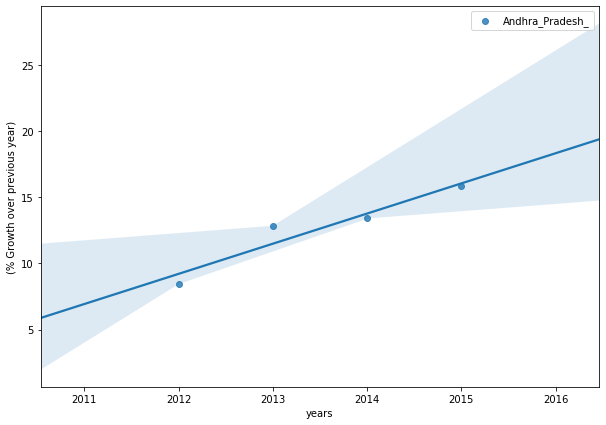

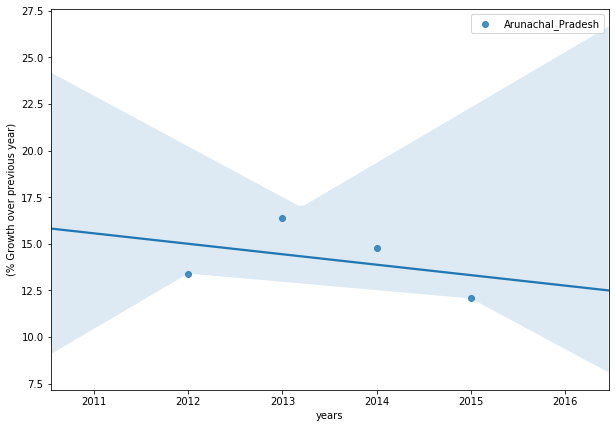

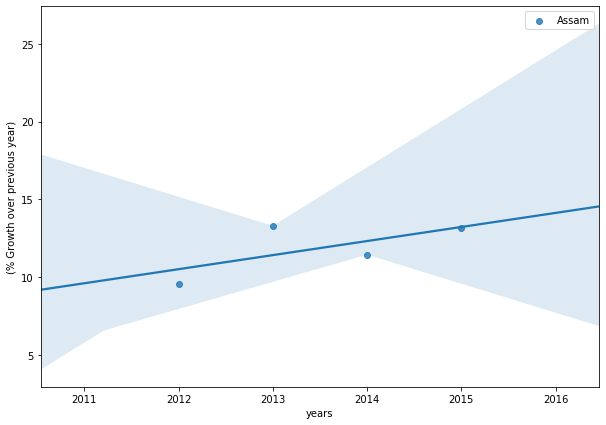

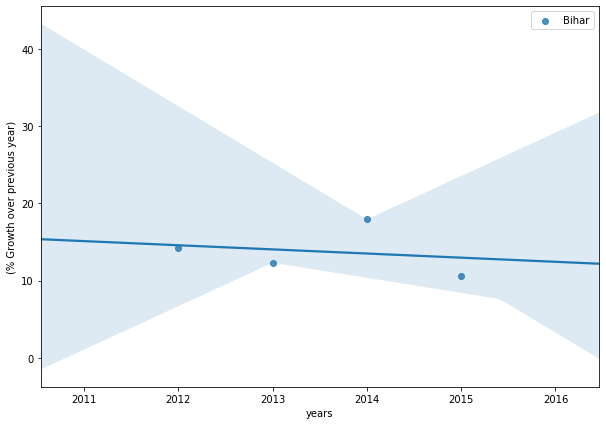

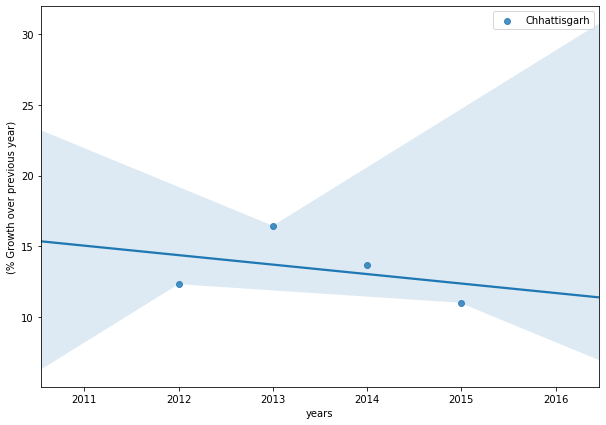

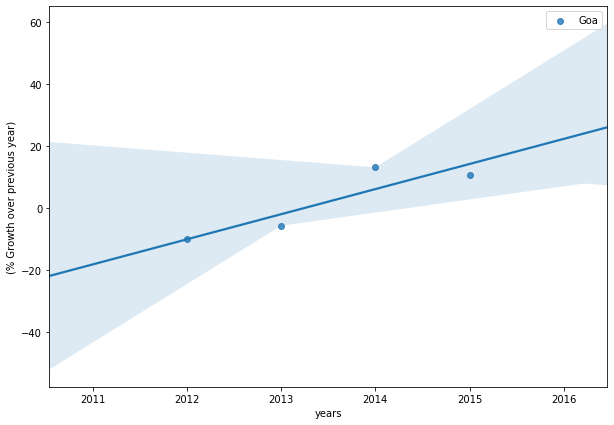

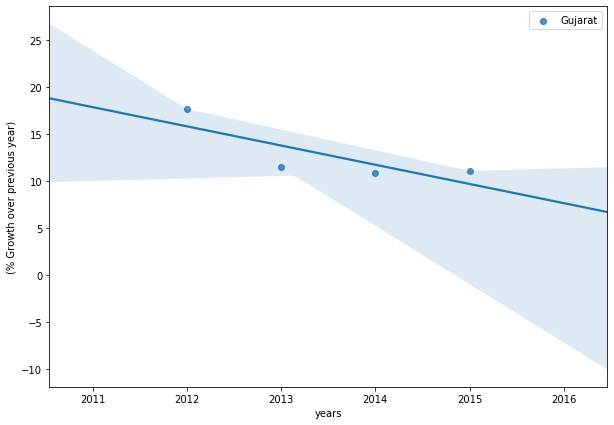

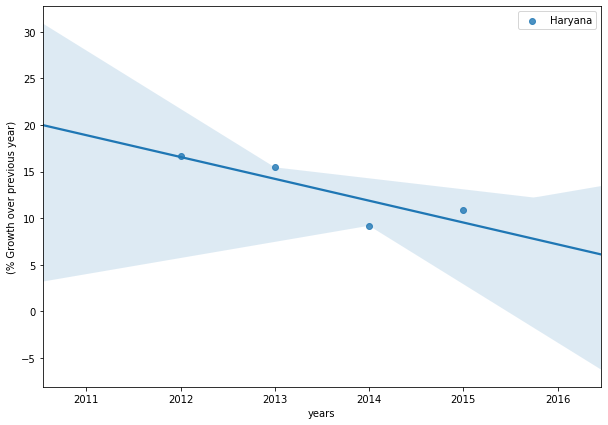

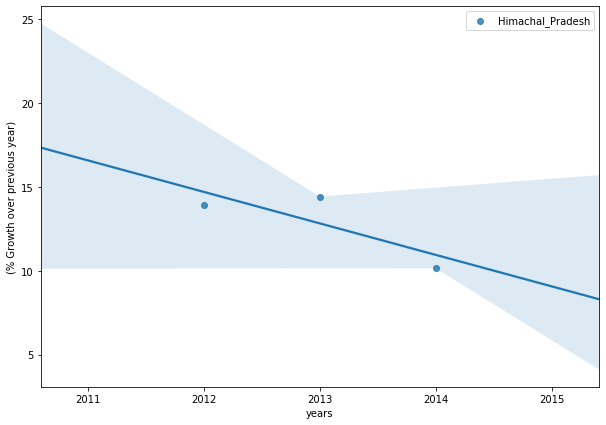

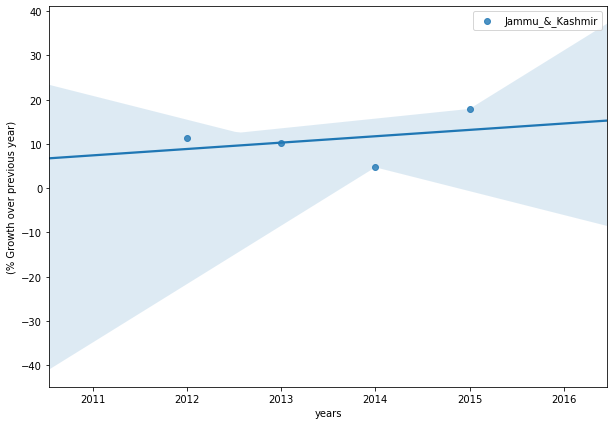

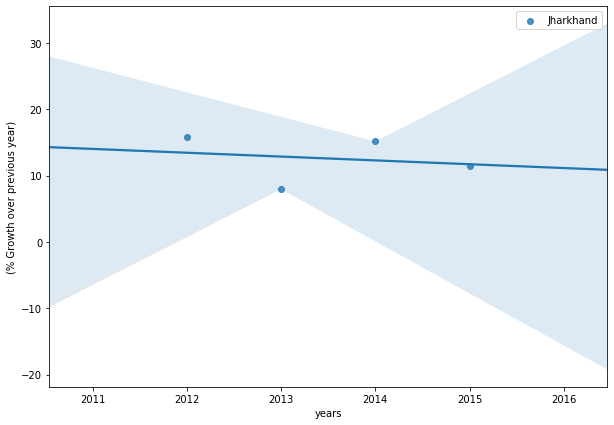

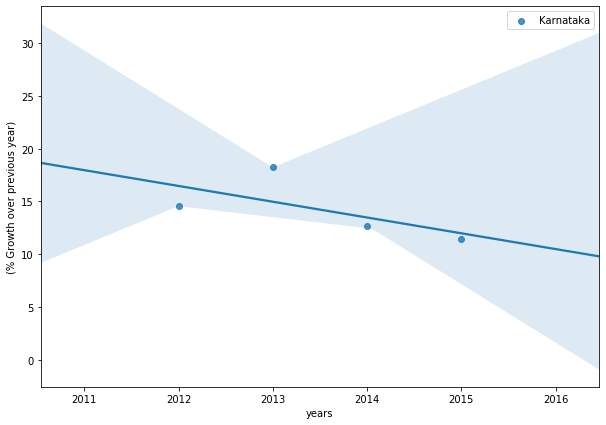

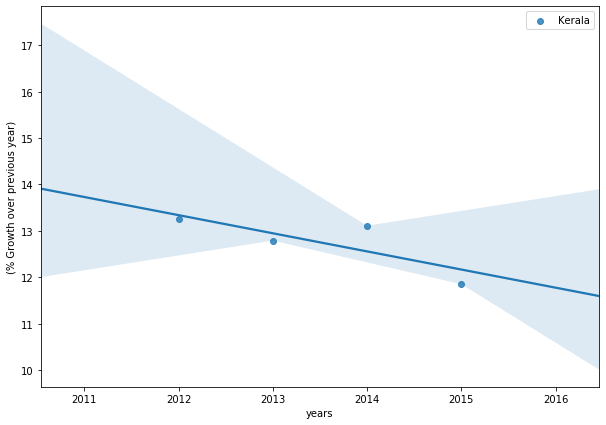

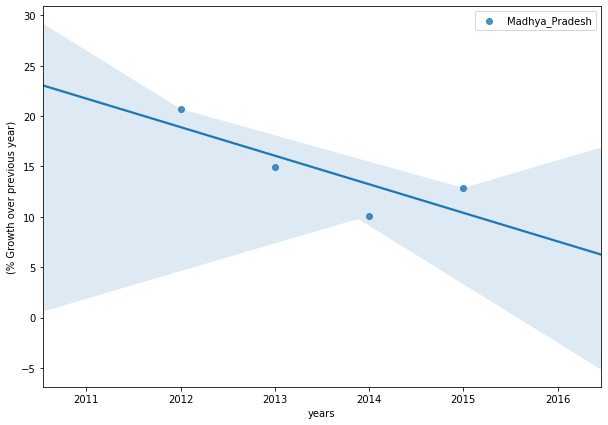

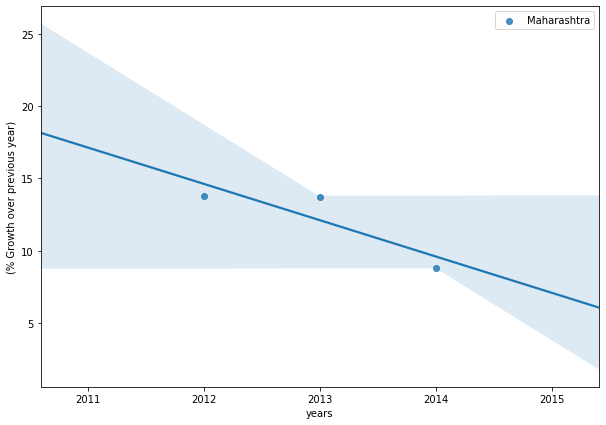

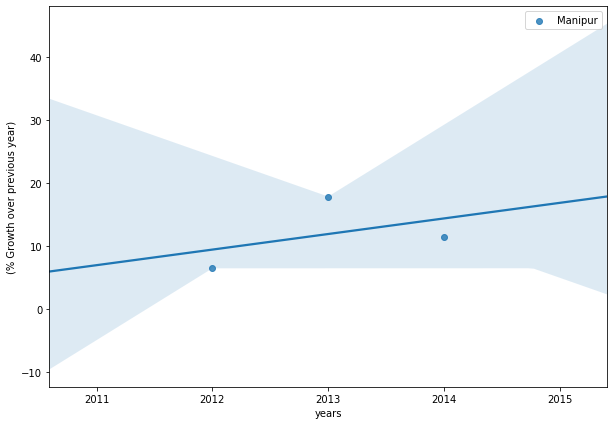

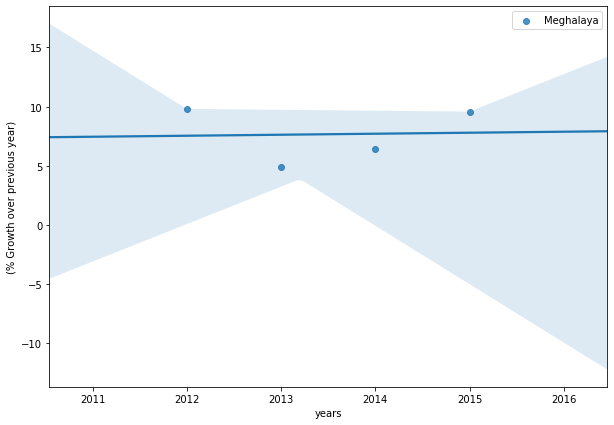

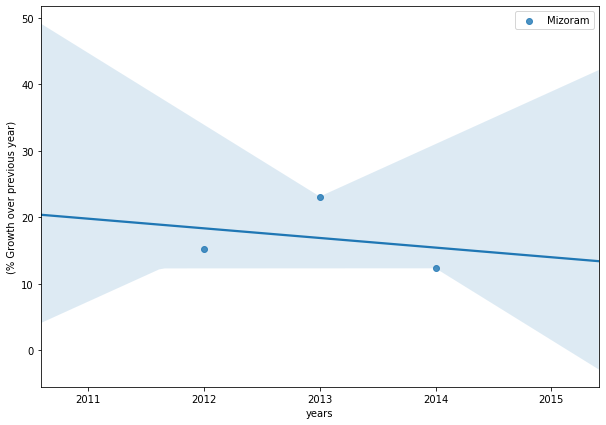

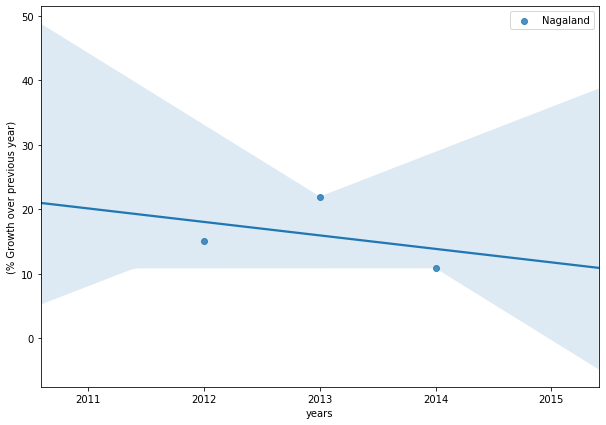

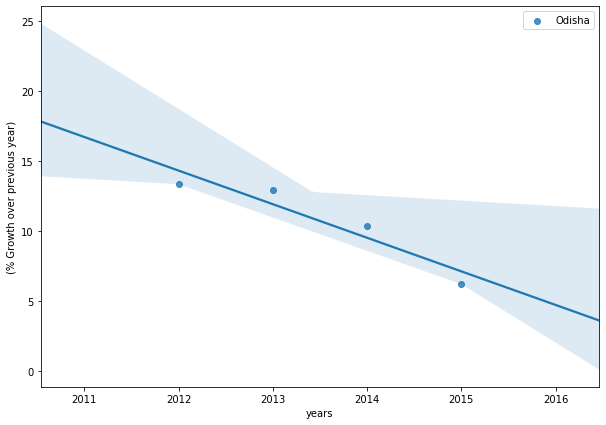

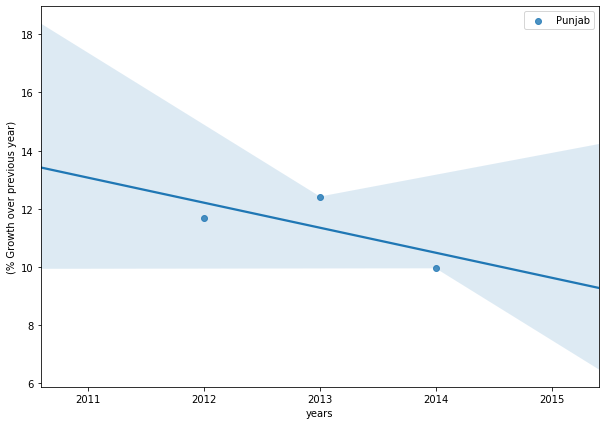

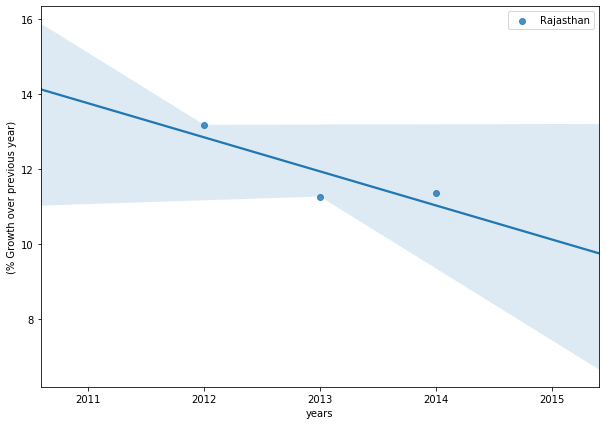

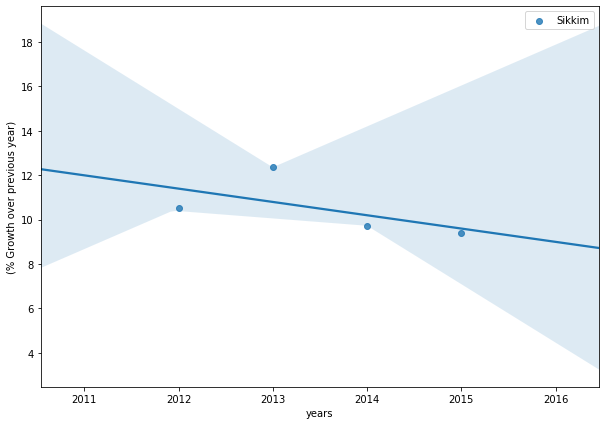

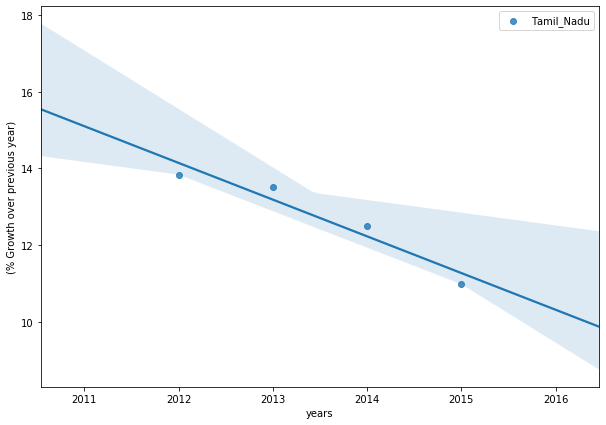

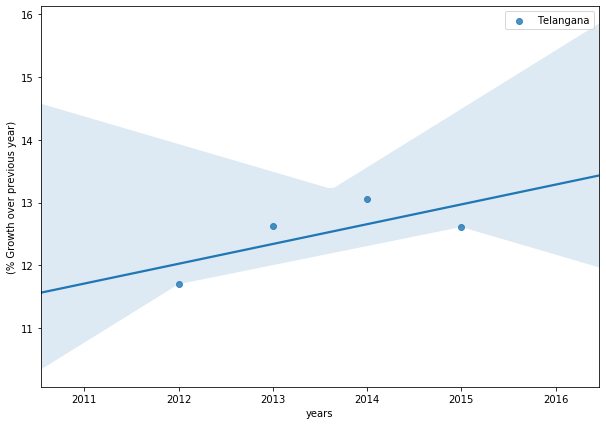

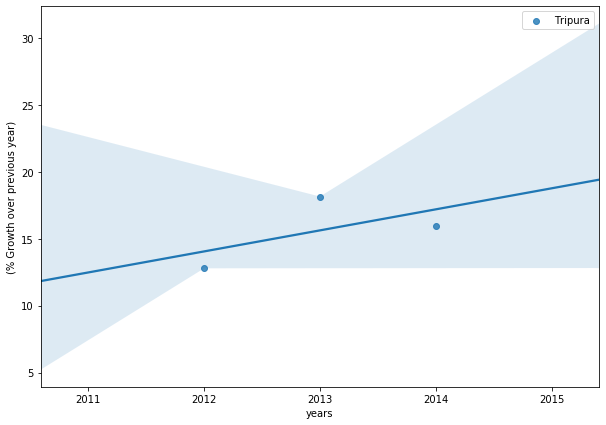

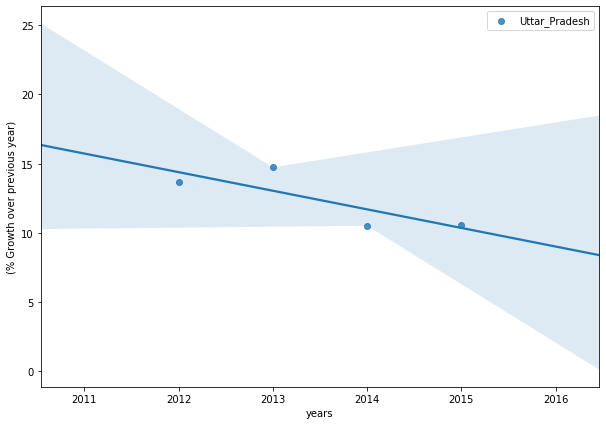

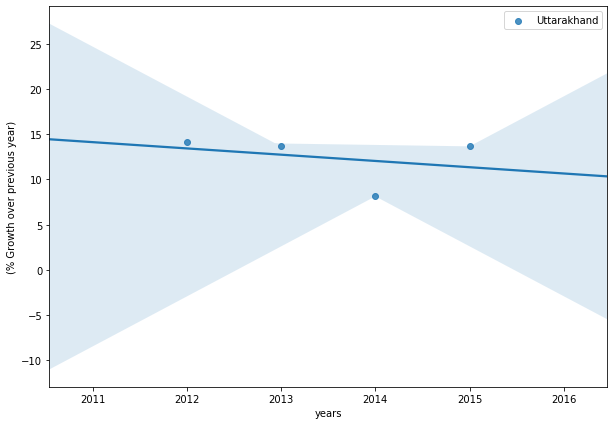

In [9]:
plt.rcParams["figure.figsize"] = [10,7]
list1=['Andhra_Pradesh_','Arunachal_Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat','Haryana','Himachal_Pradesh','Jammu_&_Kashmir','Jharkhand','Karnataka','Kerala','Madhya_Pradesh','Maharashtra','Manipur','Meghalaya','Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil_Nadu','Telangana','Tripura','Uttar_Pradesh','Uttarakhand']
for x in list1:
    sns.regplot(YEARS['Year'],YEARS[x],label= x ,color=None)
    plt.ylabel('(% Growth over previous year)')
    plt.xlabel('years')
    plt.legend()
    plt.show()

## Plotting "(% Growth over previous year)"  V/S "years" for INDIA


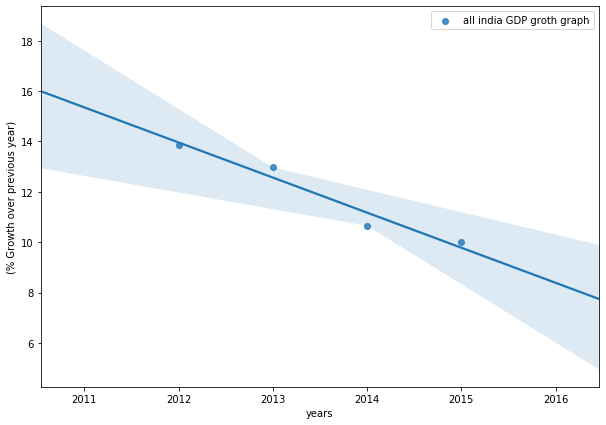

In [10]:
sns.regplot(YEARS['Year'],YEARS['All_India_GDP'],label="all india GDP groth graph" )
plt.ylabel('(% Growth over previous year)')
plt.xlabel('years')
plt.legend()
plt.show()

## Plotting  GSDP - CURRENT PRICES (` in Crore) v/s states  for  year 2015-16

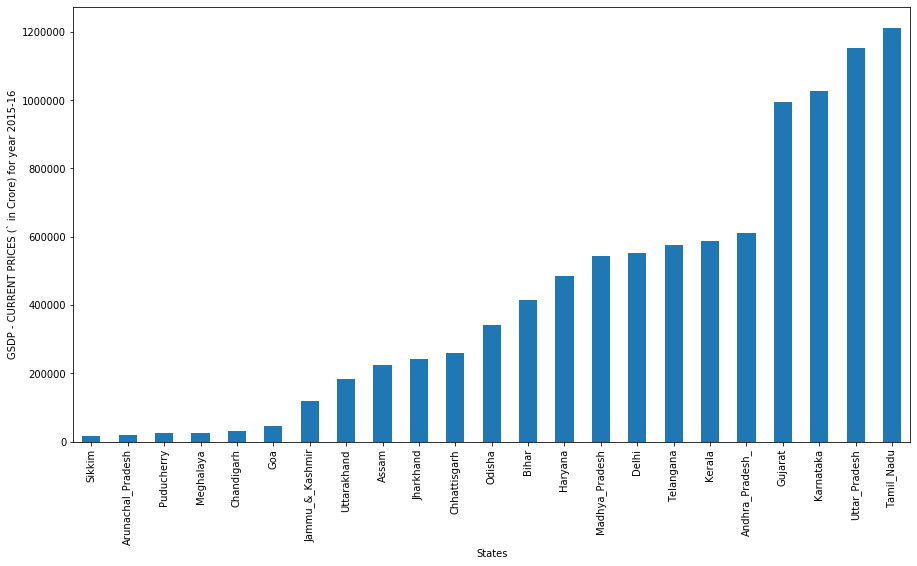

In [11]:
plt.rcParams["figure.figsize"] = [15,8]
df2.loc[(df1.Items__Description == "GSDP - CURRENT PRICES (` in Crore)")&(df1.Duration == '2015-16')].iloc[:,2:-1].T.iloc[:,-1].sort_values().dropna().plot(kind='bar') 
plt.ylabel('GSDP - CURRENT PRICES (` in Crore) for year 2015-16')
plt.xlabel('States')
plt.show()

## INSIGHTS :
Uttar pradesh is having huge popullation as similar to its GDP. On the other hand tamilnadu is having comparitively low popullation but GDP is huge. This difference is because Tamilnadu people are more skilled and are the tertiary sector of the economy and earning more than the people of Uttar pradesh. Government should focus on increasing the quality of man power of Uttar pradesh.

## Q.Which Plot will you use for this? Why? 

#### Bar graph is used for plotting the total GDP of the states for the year 2015-16 and sorting the value in ascending order which is easier to read and compare.

## Q.Identify the top 5 and the bottom 5 states based on total GDP.? 

#### Top 5 states are Tamilnadu, Uttarpradesh, Karnataka, Gujrat, Andhrapradesh. Bottom 5 states are Sikkim, Arunachal Pradesh, Meghalaya, Goa, Uttarakhand.

## Q. What states are performing poorly?

#### Sikkim, Arunachal Pradesh, Meghalaya, Goa, Uttarakhand are performing poorly.

## Q. What insights can you draw from this graph? 

#### Most of the poorly performing states are in the east side of the country and does not have good terrain landscape i.e most of the part are covered in mountains and hilly areas. These areas are not having better infrastructure such as for transportation, thus having lack of opportunities for jobs and business. As compare to other states these states are having low population. These states are very good for tourist destination according to me government should take actions in order to improve the tourism in these areas.


# Part I-B:

## IMPORTING DATASET

### (Data I-B): This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies.

## Joining data set of each states 

In [12]:
path = r'C:\\Users\\Paunikar\\Documents\\gdp me\\csv file folder\\'
all_files = glob.glob(path + "NAD*.csv")
df_from_each_file = (pd.read_csv(f, encoding = 'ISO-8859-1') for f in all_files)
concatenated_df   = pd.concat(df_from_each_file,ignore_index=True,sort=False)
concatenated_df.head()

,S.No.,Item,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,1,"Agriculture, forestry and fishing",9400805.0,11186428.0,12895568.0,14819416.0,17326726.0,20386004.0
1,1.1,Crops,5204052.0,6123041.0,7114707.0,7893514.0,8644285.0,9717089.0
2,1.2,Livestock,2758776.0,3358438.0,3643026.0,4309078.0,5155487.0,5979648.0
3,1.3,Forestry and logging,250314.0,253029.0,280493.0,346160.0,340550.0,335487.0
4,1.4,Fishing and aquaculture,1187663.0,1451920.0,1857342.0,2270664.0,3186404.0,4353780.0


In [13]:
statelist=['Andhra pradesh', 'Arunachal pradesh', 'Assam', 'Bihar','Chhatisgarh','Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh','Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra','Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab','Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura','Uttarpradesh','Uttara khand']
statelistindex=[]
for x in range(33):
    for x in statelist:
        statelistindex.append(x)
statelistindex.sort()    

## Remove extra year('2011-12', '2012-13','2013-14','2015-16','2016-17') columns

In [14]:
#Remove extra year('2011-12', '2012-13','2013-14','2015-16','2016-17') columns as we dont require it now.
STATES_df = pd.DataFrame(statelistindex,columns=['STATES']) 
finaldf = pd.concat([concatenated_df,STATES_df],axis=1)
finaldf=finaldf.drop(['2011-12', '2012-13','2013-14','2015-16','2016-17'], axis=1)
finaldf.head()

,S.No.,Item,2014-15,STATES
0,1,"Agriculture, forestry and fishing",14819416.0,Andhra pradesh
1,1.1,Crops,7893514.0,Andhra pradesh
2,1.2,Livestock,4309078.0,Andhra pradesh
3,1.3,Forestry and logging,346160.0,Andhra pradesh
4,1.4,Fishing and aquaculture,2270664.0,Andhra pradesh


## Per Capita GSDP (Rs.) per STATES

In [15]:
# renaming mainindex to STATES
finaldfl=finaldf.drop(['S.No.'], axis=1)
finaldfl.set_index("Item", inplace = True) 
finaldfl.head()

# taking only ["Per Capita GSDP (Rs.)"] for each STATE and making df
PerCapitaGSDP = finaldfl.loc[["Per Capita GSDP (Rs.)"]]
PerCapitaGSDP2 =PerCapitaGSDP.sort_values(by=['STATES']).rename(columns={'2014-15': 'Per Capita GSDP (Rs.)'}).set_index("STATES", inplace = False)
PerCapitaGSDPfinaldf = PerCapitaGSDP2.sort_values(by=['Per Capita GSDP (Rs.)'])
Per_Capita_GSDP = PerCapitaGSDPfinaldf
PerCapitaGSDPfinaldf

,Per Capita GSDP (Rs.)
STATES,
Bihar,33954.0
Uttarpradesh,49450.0
Manipur,58442.0
Assam,60621.0
Jharkhand,62091.0
Madhya Pradesh,62989.0
Odisha,73979.0
Meghalaya,76228.0
Tripura,77358.0


## Plotting Per Capita GSDP (Rs.) for each STATES

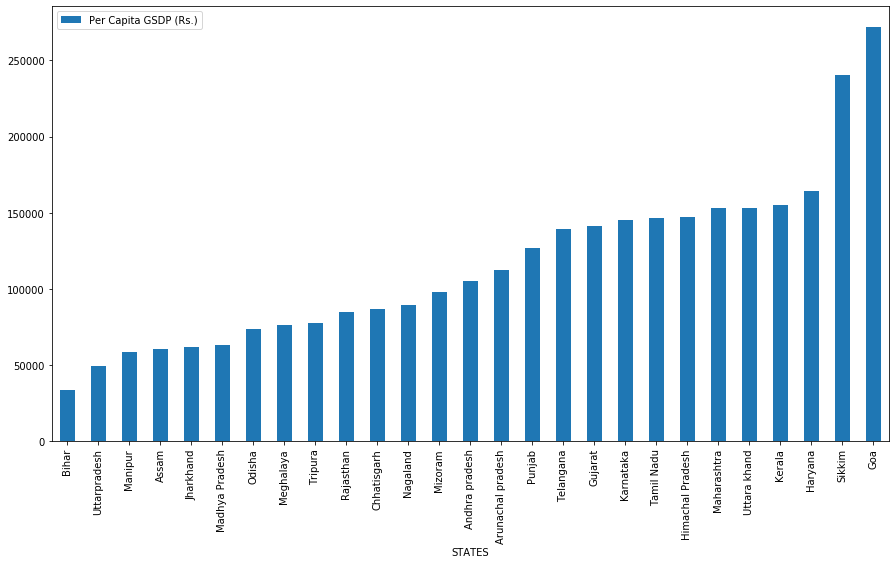

In [16]:
plt.rcParams["figure.figsize"] = [15,8]
PerCapitaGSDPfinaldf[["Per Capita GSDP (Rs.)"]].plot.bar()

## Q. Identify the top 5 and the bottom 5 states based on the GDP per capita.? 

#### Top 5 states are Goa, Sikkim, Haryana, Kerala, Uttarakhand. Top  bottom states are Bihar, Uttarprdesh, Manipur, Assam, Jharkhand.


## Q. Find the ratio of the highest per capita GDP to the lowest per capita GDP.


#### Finding the Ratio of state with heighest per capita GDP (GOA) with State with lowest per capita GDP(Bihar)

In [17]:
PerCapitaGSDPfinaldf.get_value("Goa", 'Per Capita GSDP (Rs.)')/PerCapitaGSDPfinaldf.get_value("Bihar", 'Per Capita GSDP (Rs.)') 

8.004741709371503

# Removing s.no column & making dataset (i.e. finaldf)

In [18]:
finaldf=finaldf.drop(['S.No.'], axis=1)
finaldf.set_index("Item", inplace = True) 
finaldf.head()

,2014-15,STATES
Item,,
"Agriculture, forestry and fishing",14819416.0,Andhra pradesh
Crops,7893514.0,Andhra pradesh
Livestock,4309078.0,Andhra pradesh
Forestry and logging,346160.0,Andhra pradesh
Fishing and aquaculture,2270664.0,Andhra pradesh


## Extracting  primary , secondary , tertiary , per Capita GSDP (Rs.) , gross State Domestic Product,taxes on Products , subsidies on products , Population and making dataframe

In [19]:
extractdf=finaldf.loc[["Primary"]]
extractdf2=finaldf.loc[["Secondary"]]
extractdf3=finaldf.loc[["Tertiary"]]
extractdf4=finaldf.loc[["Per Capita GSDP (Rs.)"]]
extractdf5=finaldf.loc[["Gross State Domestic Product"]]
extractdf6=finaldf.loc[["Taxes on Products"]]
extractdf7=finaldf.loc[["Subsidies on products"]]
extractdf8=finaldf.loc[["Population ('00)"]]

In [20]:
primary=extractdf.sort_values(by=['STATES']).rename(columns={'2014-15': 'primary'}).set_index("STATES", inplace = False) 
secondary=extractdf2.sort_values(by=['STATES']).rename(columns={'2014-15': 'secondary'}).set_index("STATES", inplace = False) 
tertiary=extractdf3.sort_values(by=['STATES']).rename(columns={'2014-15': 'tertiary'}).set_index("STATES", inplace = False) 
percapitagsdp=extractdf4.sort_values(by=['STATES']).rename(columns={'2014-15': 'per Capita GSDP (Rs.)'}).set_index("STATES", inplace = False) 
gsdp=extractdf5.sort_values(by=['STATES']).rename(columns={'2014-15': 'gross State Domestic Product'}).set_index("STATES", inplace = False) 
taxes=extractdf6.sort_values(by=['STATES']).rename(columns={'2014-15': 'taxes on Products'}).set_index("STATES", inplace = False) 
subsidy=extractdf7.sort_values(by=['STATES']).rename(columns={'2014-15': 'subsidies on products'}).set_index("STATES", inplace = False) 
population=extractdf8.sort_values(by=['STATES']).rename(columns={'2014-15': 'Population'}).set_index("STATES", inplace = False) 
concatDB = pd.concat([primary,secondary,tertiary,percapitagsdp,gsdp,taxes,subsidy,population],axis=1)
concatDB.head()
# concatDB consist of primary , secondary , tertiary , per Capita GSDP (Rs.) ,
#                     gross State Domestic Product,taxes on Products , subsidies on products , Population columns

,primary,secondary,tertiary,per Capita GSDP (Rs.),gross State Domestic Product,taxes on Products,subsidies on products,Population
STATES,,,,,,,,
Andhra pradesh,16303716.0,10488884.0,22032942.0,104977.0,52646842.0,5512100.0,1690800.0,501510.0
Arunachal pradesh,716959.0,287489.0,631844.0,112718.0,1676119.0,70099.0,30272.0,14870.0
Assam,5326697.0,4033091.0,9307109.0,60621.0,19809800.0,1725309.0,582406.0,326780.0
Bihar,8019997.0,5984896.0,22179969.0,33954.0,37391988.0,3213546.0,2006421.0,1101240.0
Chhatisgarh,6400817.0,8238886.0,7588778.0,86860.0,23498180.0,2601791.0,1332092.0,270530.0


## Making columns of primary , secondary , tertiary as percentage contribution in GDP

In [21]:
# Adding columns of primary , secondary , tertiary as percentage contribution in GDP to concat DB
concatDB["primary_contribution_in_%"]=(concatDB["primary"]/concatDB["gross State Domestic Product"])*100
concatDB["secondary_contribution_in_%"]=(concatDB["secondary"]/concatDB["gross State Domestic Product"])*100
concatDB["tertiary_contribution_in_%"]=(concatDB["tertiary"]/concatDB["gross State Domestic Product"])*100
primary_secondary_tertiary_df=concatDB
concatDB.head()

,primary,secondary,tertiary,per Capita GSDP (Rs.),gross State Domestic Product,taxes on Products,subsidies on products,Population,primary_contribution_in_%,secondary_contribution_in_%,tertiary_contribution_in_%
STATES,,,,,,,,,,,
Andhra pradesh,16303716.0,10488884.0,22032942.0,104977.0,52646842.0,5512100.0,1690800.0,501510.0,30.968080,19.923102,41.850453
Arunachal pradesh,716959.0,287489.0,631844.0,112718.0,1676119.0,70099.0,30272.0,14870.0,42.774946,17.152064,37.696846
Assam,5326697.0,4033091.0,9307109.0,60621.0,19809800.0,1725309.0,582406.0,326780.0,26.889201,20.359070,46.982347
Bihar,8019997.0,5984896.0,22179969.0,33954.0,37391988.0,3213546.0,2006421.0,1101240.0,21.448437,16.005825,59.317437
Chhatisgarh,6400817.0,8238886.0,7588778.0,86860.0,23498180.0,2601791.0,1332092.0,270530.0,27.239629,35.061805,32.295173


## Plotting  primary , secondary , tertiary as percentage contribution in GDP

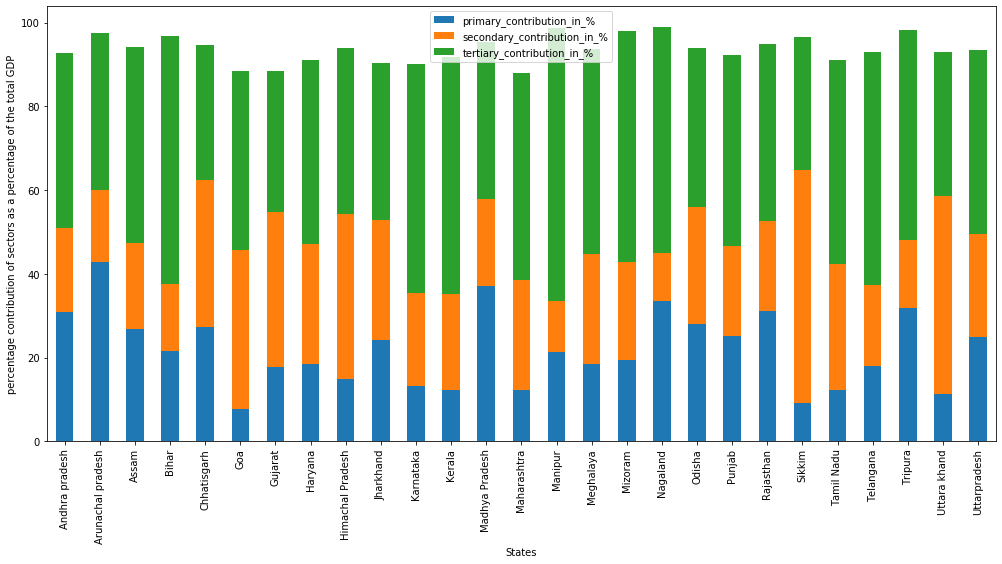

In [22]:
plt.rcParams["figure.figsize"] = [17,8]
concatDB.sort_values("per Capita GSDP (Rs.)")
concatDB[["primary_contribution_in_%","secondary_contribution_in_%","tertiary_contribution_in_%"]].plot(kind='bar', stacked=True)
plt.ylabel('percentage contribution of sectors as a percentage of the total GDP')
plt.xlabel('States')
plt.show()

## Q.Which plot will you use here? Why? 

#### For percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states I used a stacked bar graph. A stacked bar graph (or stacked bar chart)  is a chart that uses bars to show comparisons between categories of data, but with ability to break down and compare parts of a whole. Each bar in the chart represents a whole, and segments in the bar represent different parts or categories of that whole. Stacked bars do a good job of featuring the total and also providing a hint as to how the total for each category value is divided into parts

## Plotting  gross State Domestic Product and Population for further analysis

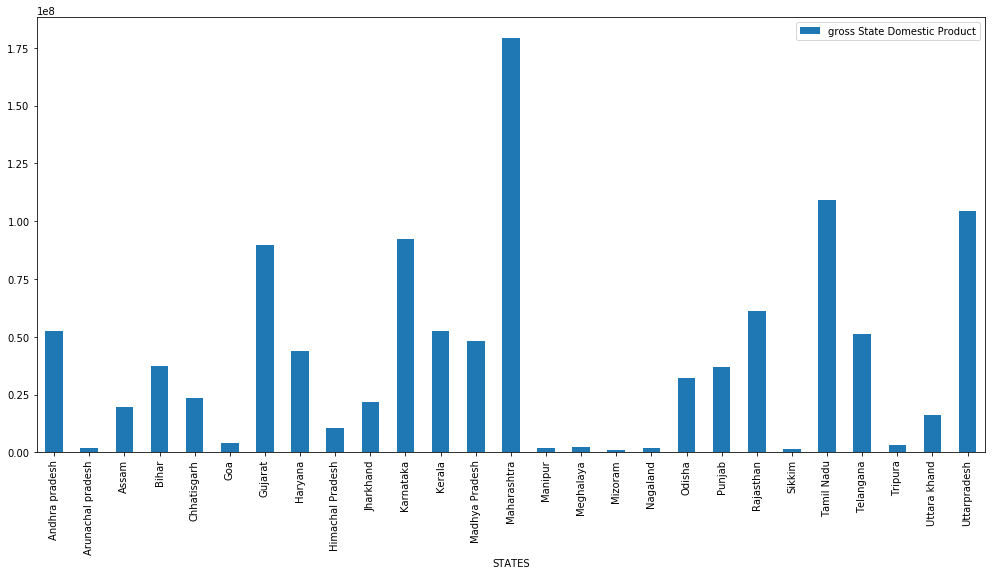

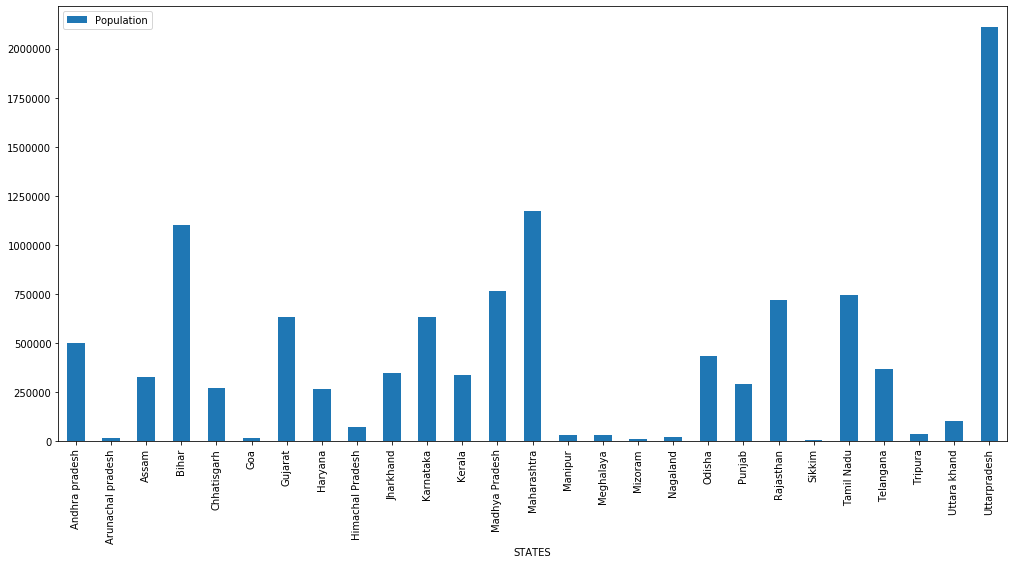

In [23]:
plt.rcParams["figure.figsize"] = [17,8]
concatDB[["gross State Domestic Product"]].plot.bar()
concatDB[["Population"]].plot.bar()

## INSIGHTS :
Uttar Pradesh is the most populated state but its GSDP is low.On the other hand second most populated state maharashtra having GSDP more than on uttar pradesh.There are many factors for this situation.One of the main facotor is Maharashtra people are more educated than Uttarpradesh people. Uttar pradesh people are more engage in the primary sector such as agriculture. 


## Plotting  per Capita GSDP (Rs.) and Population for further analysis

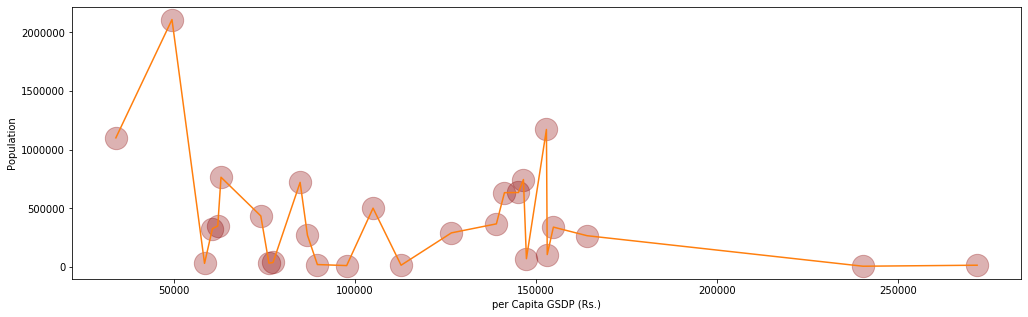

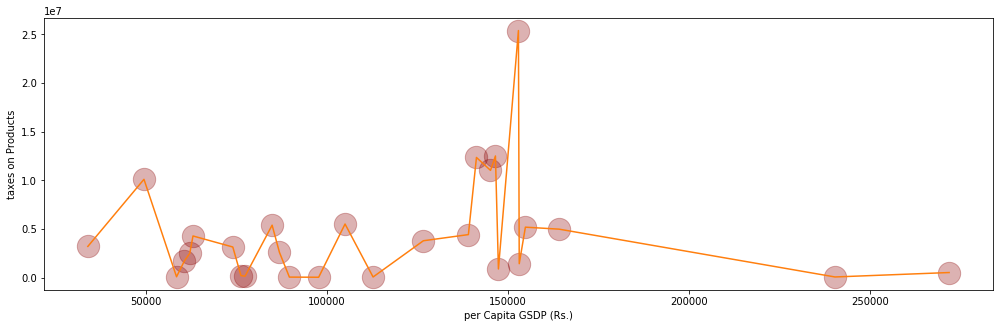

In [24]:
plt.rcParams["figure.figsize"] = [17,5]
list1=["Population","taxes on Products"]
for x in list1:
    DF_A = concatDB[['per Capita GSDP (Rs.)',x]]
    DF_A.dropna(inplace=True)
    DF_A['per Capita GSDP (Rs.)'] = DF_A['per Capita GSDP (Rs.)'].astype(int)
    DF_A[x] = DF_A[x].astype(int)
    sns.regplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x], fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":500} )
    sns.lineplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x],dashes=False, markers=True)
    plt.show()  

## INSIGHTS :
Most of the population come under per capita GSDP (Rs.) ~150000, which is nearly equal to the half of total GDP. Ans second most people are having middle range per capita gsdp. Most of the tax are taken from the people in the middle of the graph. And these taxes are used for the people popullation having low per capita GSDP.  

##  Q. Why is (Primary + Secondary + Tertiary) not equal to total GDP.?

#### Tertiary sector per employed person has highest productivity and are responsible for the most of the tax giving percentage therefore service sector contributes the most to GDP of India. These most of the taxes are used up for giving the facilities to the people working in the primary sectors .Due to this unevenness (Primary + Secondary + Tertiary) not equal to total GDP. 

## States with lower per capita GDP

In [25]:
corrmat=concatDB.loc[['Bihar', 'Uttarpradesh', 'Manipur', 'Assam', 'Jharkhand',"Madhya Pradesh"]]
corrmat=corrmat.drop(["secondary_contribution_in_%","tertiary_contribution_in_%"], axis=1)
corrmat
# cormat dataframe consist of States with lower per capita GDP and primary_contribution_in_%


,primary,secondary,tertiary,per Capita GSDP (Rs.),gross State Domestic Product,taxes on Products,subsidies on products,Population,primary_contribution_in_%
STATES,,,,,,,,,
Bihar,8019997.0,5984896.0,22179969.0,33954.0,37391988.0,3213546.0,2006421.0,1101240.0,21.448437
Uttarpradesh,25999255.0,25548724.0,45968959.0,49450.0,104337115.0,10107396.0,3287219.0,2109940.0,24.918511
Manipur,383140.0,220173.0,1177334.0,58442.0,1804276.0,92766.0,69137.0,30873.0,21.235110
Assam,5326697.0,4033091.0,9307109.0,60621.0,19809800.0,1725309.0,582406.0,326780.0,26.889201
Jharkhand,5248354.0,6241471.0,8133341.0,62091.0,21710718.0,2499171.0,411619.0,349660.0,24.174023
Madhya Pradesh,17854020.0,10044889.0,18117360.0,62989.0,48198169.0,4284700.0,2102800.0,765180.0,37.042942


## Correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP

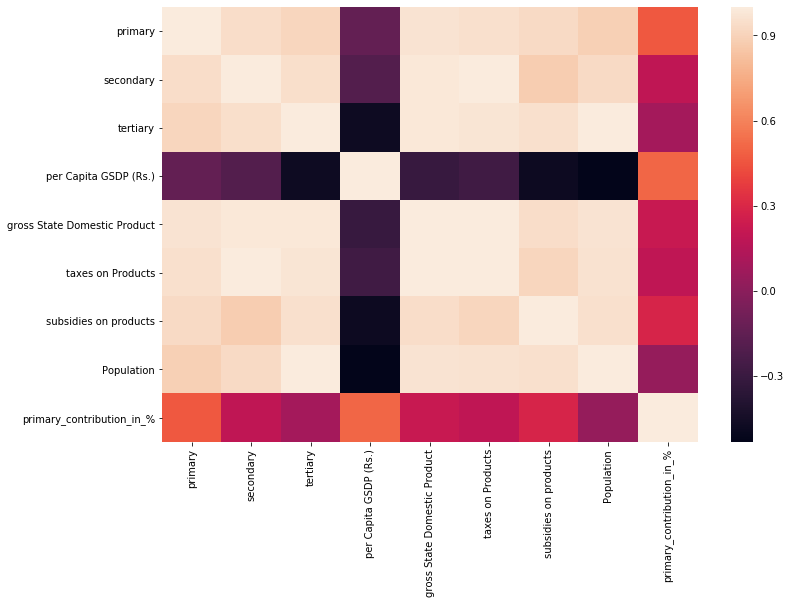

In [26]:
plt.rcParams["figure.figsize"] = [12,8]
sns.heatmap(corrmat.corr())
plt.show()

In [27]:
corrmat=corrmat[["per Capita GSDP (Rs.)","primary_contribution_in_%"]]
corrmat

,per Capita GSDP (Rs.),primary_contribution_in_%
STATES,,
Bihar,33954.0,21.448437
Uttarpradesh,49450.0,24.918511
Manipur,58442.0,21.235110
Assam,60621.0,26.889201
Jharkhand,62091.0,24.174023
Madhya Pradesh,62989.0,37.042942


## Graph between per capita GDP and %contribution of Primary sector to total GDP of States with lower per capita GSDP

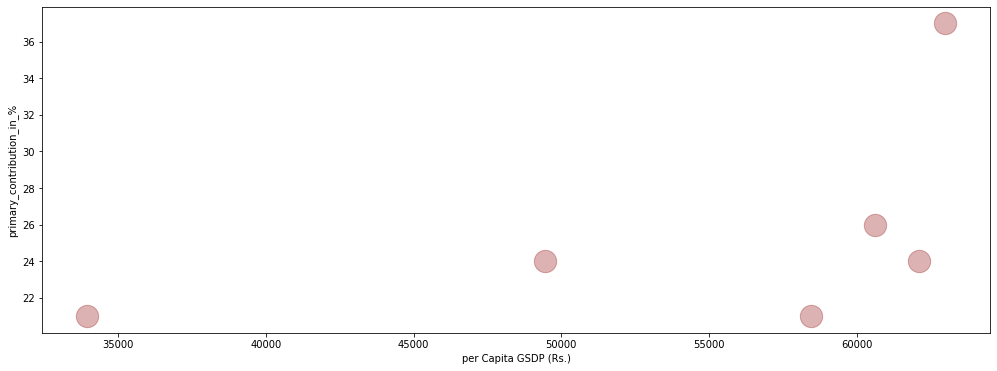

In [28]:
plt.rcParams["figure.figsize"] = [17,6]
list1=["primary_contribution_in_%"]
for x in list1:
    DF_A = corrmat[['per Capita GSDP (Rs.)',x]]
    DF_A.dropna(inplace=True)
    DF_A['per Capita GSDP (Rs.)'] = DF_A['per Capita GSDP (Rs.)'].astype(int)
    DF_A[x] = DF_A[x].astype(int)
    sns.regplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x], fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":500} )
    #sns.lineplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x],dashes=False, markers=True)
    plt.show()  

## Q. Find correlation of percentile of the state (% of states with lower per capita GDP) and            %contribution of Primary sector to total GDP?

#### Percentile contribution of Primary sector is more ,of states with lower per capita GDP to the total GDP because most of the people are engaged in agriculture (both subsistence and commercial), mining, forestry, farming, grazing, hunting and gathering, fishing, and quarrying. 

## Categorize the states into four groups based on the GDP per capita (C1, C2, C3, C4).The quantile values are (0.20,0.5, 0.85, 1)

In [29]:
Per_Capita_GSDP.quantile([0.20, 0.5, 0.85,1], axis = 0) 

,Per Capita GSDP (Rs.)
0.20,65187.0
0.50,104977.0
0.85,153246.2
1.00,271793.0


In [30]:
# Dividing states into quantile.
C4 = Per_Capita_GSDP[Per_Capita_GSDP['Per Capita GSDP (Rs.)'] <= 65187.0]
df2 = Per_Capita_GSDP[Per_Capita_GSDP['Per Capita GSDP (Rs.)'] >= 65187.0]
C3 = df2[df2['Per Capita GSDP (Rs.)'] <= 104977.0]
df4 = Per_Capita_GSDP[Per_Capita_GSDP['Per Capita GSDP (Rs.)'] >= 104977.0]
C2 = df4[df4['Per Capita GSDP (Rs.)'] <= 153246.2]
df6 = Per_Capita_GSDP[Per_Capita_GSDP['Per Capita GSDP (Rs.)'] >= 153246.2]
C1 = df6[df6['Per Capita GSDP (Rs.)'] <= 271793.0]

## C1 group STATES :Goa, Sikkim, Kerala, Haryana

In [31]:
C1

,Per Capita GSDP (Rs.)
STATES,
Kerala,154778.0
Haryana,164077.0
Sikkim,240274.0
Goa,271793.0


## C2 group STATES : Arunachal pradesh, Andhra pradesh, 'Punjab, Telangana, Gujarat, Karnataka, Tamil Nadu, Himachal pradesh, Maharashtra, Uttara khand


In [32]:
C2

,Per Capita GSDP (Rs.)
STATES,
Andhra pradesh,104977.0
Arunachal pradesh,112718.0
Punjab,126606.0
Telangana,139035.0
Gujarat,141263.0
Karnataka,145141.0
Tamil Nadu,146503.0
Himachal Pradesh,147330.0
Maharashtra,152853.0


## C3 group STATES : Odisha, Meghalaya, Tripura, Rajasthan, Chhattisgarh, Nagaland, Mizoram, Andhra Pradesh

In [33]:
C3

,Per Capita GSDP (Rs.)
STATES,
Odisha,73979.0
Meghalaya,76228.0
Tripura,77358.0
Rajasthan,84837.0
Chhatisgarh,86860.0
Nagaland,89607.0
Mizoram,97687.0
Andhra pradesh,104977.0


## C4 group STATES : Bihar, Uttarpradesh, Manipur, Assam, Jharkhand, Madhya pradesh

In [34]:
C4

,Per Capita GSDP (Rs.)
STATES,
Bihar,33954.0
Uttarpradesh,49450.0
Manipur,58442.0
Assam,60621.0
Jharkhand,62091.0
Madhya Pradesh,62989.0


## Adding columns of sub-sectors (such as agriculture , forestry and fishing , crops, manufacturing etc. , not primary , secondary and tertiary) that contribute to approximately 80% of the GSDP of each category.

In [35]:
# Adding column of construction
a=finaldf.loc[["Construction"]]
CONSTRUCTION=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Construction'}).set_index("STATES", inplace = False)
# Adding column of manufacturing
a=finaldf.loc[["Manufacturing"]]
MANUFACTURING=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Manufacturing'}).set_index("STATES", inplace = False)
# Adding column of Taxes on Products
a=finaldf.loc[["Taxes on Products"]]
TAX=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Taxes on Products'}).set_index("STATES", inplace = False)
# Adding column of Agriculture, forestry and fishing
a=finaldf.loc[["Agriculture, forestry and fishing"]]
AGRI=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Agriculture, forestry and fishing'}).set_index("STATES", inplace = False)
# Adding column of Trade, repair, hotels and restaurants
a=finaldf.loc[["Trade, repair, hotels and restaurants"]]
TRADE=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Trade, repair, hotels and restaurants'}).set_index("STATES", inplace = False)
# Adding column of Real estate, ownership of dwelling & professional services
a=finaldf.loc[["Real estate, ownership of dwelling & professional services"]]
REESTATE=a.sort_values(by=['STATES']).rename(columns={'2014-15': 'Real estate, ownership of dwelling & professional services'}).set_index("STATES", inplace = False)
# Adding column of Gross State Domestic Product
a=finaldf.loc[["Gross State Domestic Product"]]
GSDP=a.sort_values(by=['STATES']).rename(columns={'2014-15':'Gross State Domestic Product'}).set_index("STATES", inplace = False)
# Adding column of Other services
a=finaldf.loc[["Other services"]]
OTHER=a.sort_values(by=['STATES']).rename(columns={'2014-15':'Other services'}).set_index("STATES", inplace = False)

SECTORS = pd.concat([CONSTRUCTION,MANUFACTURING,TAX,AGRI,TRADE,REESTATE,OTHER,GSDP],axis=1)
SECTORS.head()

# SECTORS dataframe consist ofcolumns of sub-sectors
#    (such as agriculture , forestry and fishing ,crops, 
#     manufacturing etc. , not primary , secondary and tertiary) 
#     that contribute to approximately 80% of the GSDP of each category.

,Construction,Manufacturing,Taxes on Products,"Agriculture, forestry and fishing","Trade, repair, hotels and restaurants","Real estate, ownership of dwelling & professional services",Other services,Gross State Domestic Product
STATES,,,,,,,,
Andhra pradesh,4664889.0,4672266.0,5512100.0,14819416.0,4233400.0,4405409.0,4215389.0,52646842.0
Arunachal pradesh,147842.0,26120.0,70099.0,686117.0,60421.0,48418.0,218728.0,1676119.0
Assam,1733568.0,2002936.0,1725309.0,3855548.0,2987155.0,1412466.0,1795658.0,19809800.0
Bihar,3449763.0,2189965.0,3213546.0,7951890.0,7448373.0,3740641.0,4587589.0,37391988.0
Chhatisgarh,2669855.0,4370593.0,2601791.0,3948847.0,1535571.0,2462166.0,1112232.0,23498180.0


## C1 group  STATES top sub sectors having contribution ~ 80%

In [36]:
a=SECTORS.loc[['Goa', 'Sikkim', 'Kerala', 'Haryana']]

STATES,percent contribution of each sector
of group C1 various sub sector contribution sum,
8059922.0,7.907258
10774501.0,10.570420
11264451.0,11.051090
13758793.0,13.498187
13995159.0,13.730076
14391809.0,14.119213
14740245.0,14.461049
Total percent contribution of sub sector,85.337293


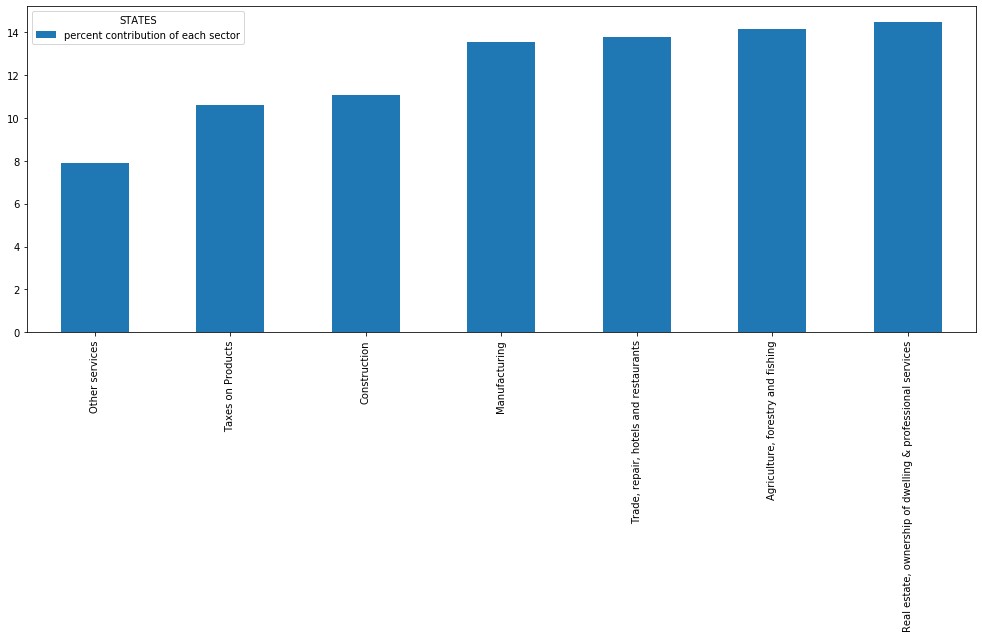

In [37]:
plt.rcParams["figure.figsize"] = [17,6]
B=a.sort_values(by=['STATES'])
B.loc['of group C1 various sub sector contribution sum'] = B.sum()
a=B.loc[["of group C1 various sub sector contribution sum"]]
C=a.T
C["percent contribution of each sector"]=(C["of group C1 various sub sector contribution sum"]/C.get_value("Gross State Domestic Product", 'of group C1 various sub sector contribution sum'))*100
D=C.drop(['Gross State Domestic Product'], axis=0).sort_values('percent contribution of each sector')
D[["percent contribution of each sector"]].plot.bar()
e=D.set_index("of group C1 various sub sector contribution sum")
e.loc['Total percent contribution of sub sector'] = e.sum()
e

## C2 group  STATES top sub sectors having contribution ~ 80%

In [38]:
a=SECTORS.loc[['Arunachal pradesh',"Andhra pradesh", 'Punjab','Telangana', 'Gujarat', 'Karnataka', 'Tamil Nadu',"Himachal pradesh",'Maharashtra', 'Uttara khand']]

STATES,percent contribution of each sector
of group C1 various sub sector contribution sum,
39545882.0,6.291200
44510195.0,7.080954
64856766.0,10.317810
76518825.03999999,12.173082
88513457.0,14.081261
95400918.0,15.176960
111325159.0,17.710286
Total percent contribution of sub sector,82.831553


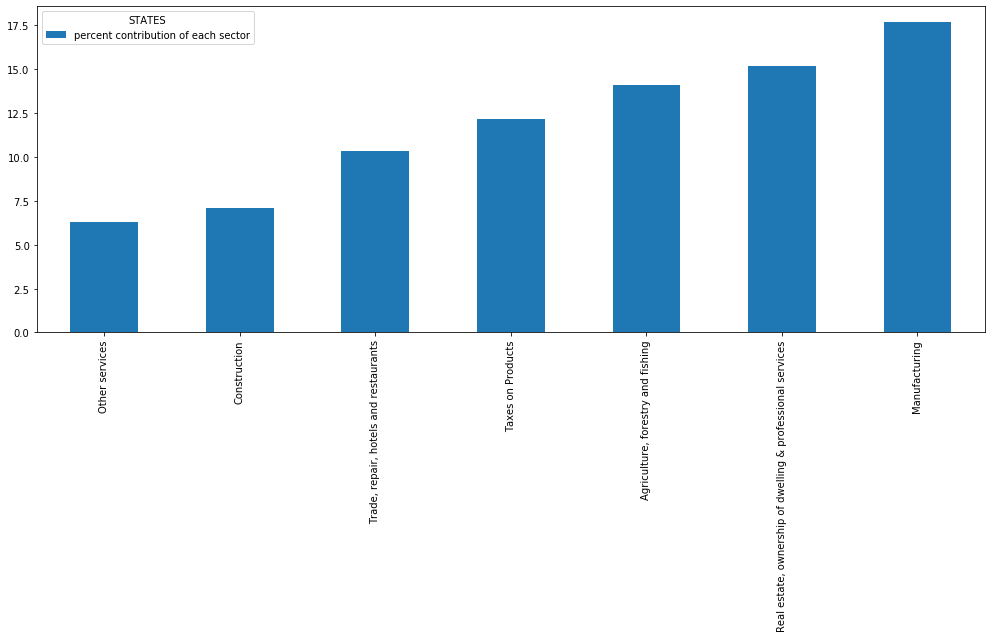

In [39]:
plt.rcParams["figure.figsize"] = [17,6]
B=a.sort_values(by=['STATES'])
B.loc['of group C1 various sub sector contribution sum'] = B.sum()
a=B.loc[["of group C1 various sub sector contribution sum"]]
C=a.T
C["percent contribution of each sector"]=(C["of group C1 various sub sector contribution sum"]/C.get_value("Gross State Domestic Product", 'of group C1 various sub sector contribution sum'))*100
D=C.drop(['Gross State Domestic Product'], axis=0).sort_values('percent contribution of each sector')
D[["percent contribution of each sector"]].plot.bar()
e=D.set_index("of group C1 various sub sector contribution sum")
e.loc['Total percent contribution of sub sector'] = e.sum()
e

## C3 group  STATES top sub sectors having contribution ~ 80%

In [40]:
a=SECTORS.loc[[ 'Odisha', 'Meghalaya', 'Tripura', 'Rajasthan','Chhattisgarh', 'Nagaland',"Mizoram","Andhra pradesh"]]

STATES,percent contribution of each sector
of group C1 various sub sector contribution sum,
11703185.0,7.576436
13038066.0,8.440615
13761952.0,8.909246
14521162.0,9.400745
15709738.0,10.170208
17667738.0,11.437783
38278041.0,24.780530
Total percent contribution of sub sector,80.715562


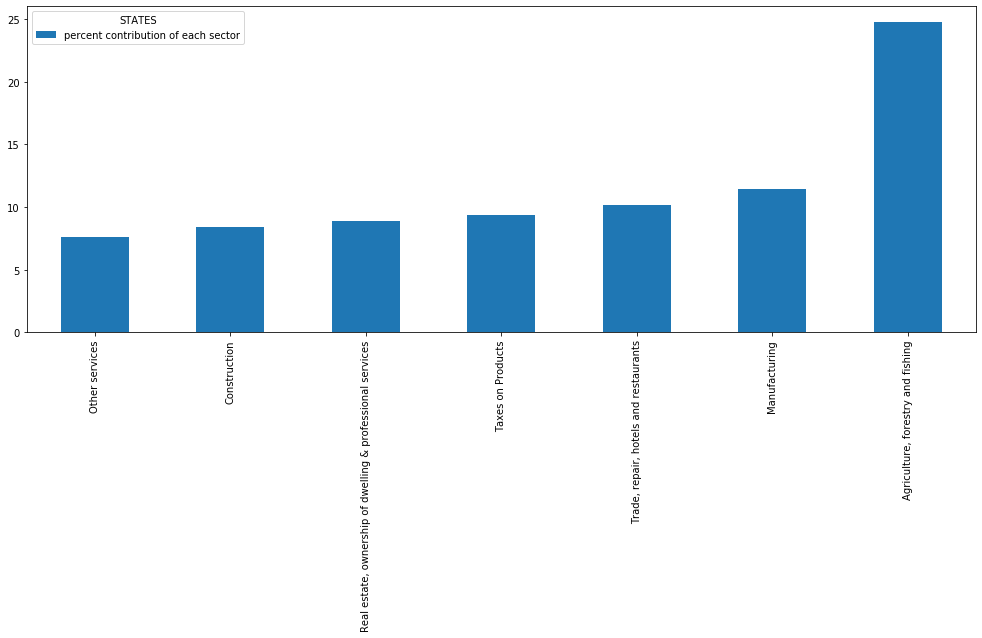

In [41]:
plt.rcParams["figure.figsize"] = [17,6]
B=a.sort_values(by=['STATES'])
B.loc['of group C1 various sub sector contribution sum'] = B.sum()
a=B.loc[["of group C1 various sub sector contribution sum"]]
C=a.T
C["percent contribution of each sector"]=(C["of group C1 various sub sector contribution sum"]/C.get_value("Gross State Domestic Product", 'of group C1 various sub sector contribution sum'))*100
D=C.drop(['Gross State Domestic Product'], axis=0).sort_values('percent contribution of each sector')
D[["percent contribution of each sector"]].plot.bar()
e=D.set_index("of group C1 various sub sector contribution sum")
e.loc['Total percent contribution of sub sector'] = e.sum()
e

## C4 group  STATES top sub sectors having contribution ~ 80%

In [42]:
a=SECTORS.loc[['Bihar', 'Uttarpradesh', 'Manipur', 'Assam', 'Jharkhand',"Madhya pradesh"]]

STATES,percent contribution of each sector
of group C1 various sub sector contribution sum,
13111210.0,7.085076
17638188.0,9.531379
18372797.0,9.928349
20618199.0,11.141726
21517411.0,11.627645
22127080.0,11.957100
40499397.0,21.885190
Total percent contribution of sub sector,83.156467


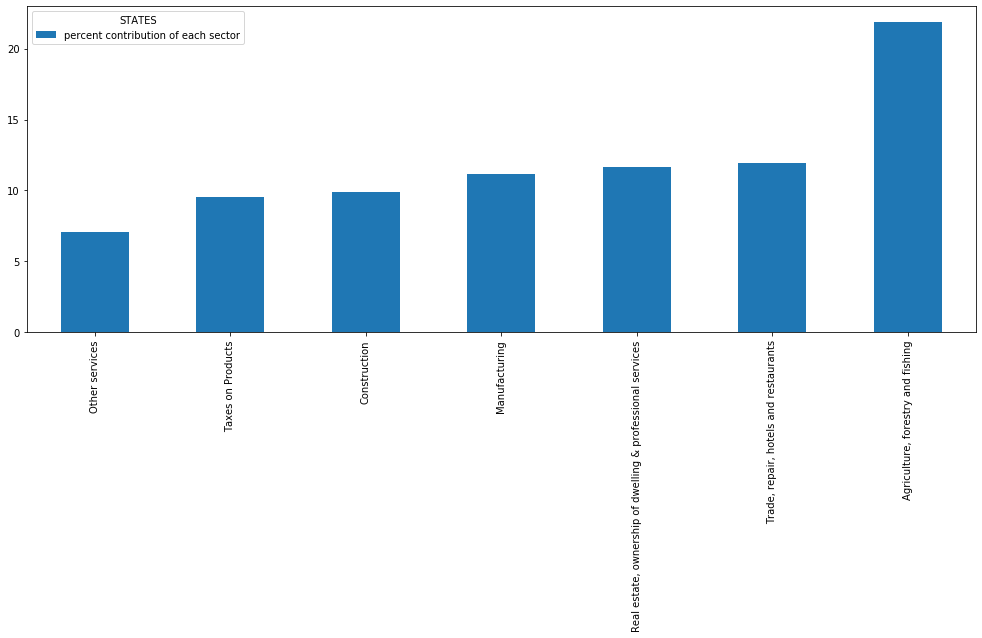

In [43]:
plt.rcParams["figure.figsize"] = [17,6]
B=a.sort_values(by=['STATES'])
B.loc['of group C1 various sub sector contribution sum'] = B.sum()
a=B.loc[["of group C1 various sub sector contribution sum"]]
C=a.T
C["percent contribution of each sector"]=(C["of group C1 various sub sector contribution sum"]/C.get_value("Gross State Domestic Product", 'of group C1 various sub sector contribution sum'))*100
D=C.drop(['Gross State Domestic Product'], axis=0).sort_values('percent contribution of each sector')
D[["percent contribution of each sector"]].plot.bar()
e=D.set_index("of group C1 various sub sector contribution sum")
e.loc['Total percent contribution of sub sector'] = e.sum()
e

## Q. Find the top  sub-sectors that contribute to approximately 80% of the GSDP of each category.?

#### FOR C1 category:   real estate ownership of dwelling & professional services, Agriculture forestry and fishing, Trade repair hotels and restaurants

#### FOR C2 category:    Manufacturing, real estate ownership of dwelling & professional services, Agriculture forestry and fishing

#### FOR C3 category:   Agriculture forestry and fishing, Manufacturing, Trade repair hotels and restaurants

#### FOR C4 category:   Agriculture forestry and fishing, Trade repair hotels and restaurants, , real estate ownership of dwelling & professional services


## Q. How does the GDP distribution of the top states (C1) differ from the others? 

#### C1 states are comprising mostly of real estate ownership of dwelling & professional services, Agriculture forestry and fishing, Trade repair hotels and restaurants etc. C1 category states are mostly based on the real estate and ownership but other category states are majorly based on manufacturing and agriculture forestry.


## Q. Which sub-sectors seem to be correlated with high GDP? 
#### real estate ownership of dwelling & professional services Agriculture,   forestry and fishing, Trade, repair,  hotels and restaurants   Manufacturing

## Q.Which sub-sectors do the various categories need to focus on?

#### FOR C1 category: other services, taxes on products, construction
#### FOR C2 category: other services,  construction, Trade, repair, hotels and restaurants
#### FOR C3 category: other services,  construction, real estate ownership of dwelling & professional services
#### FOR C4 category: other services, taxes on products, construction


## Q.Finally, provide at least two recommendations for each category to improve the per capita GDP.

#### FOR C1 category:
##### 1 New hotels, schools, offices and Community centers should be open to use infrastructure effectively.
##### 2 Easy and people friendly government policies should be applied for the ease of people.

####  FOR C2 category:
##### 1 In this category most of the states are capable for tourism such as hill stations and beach resorts. Government should focus on these capabilities of these states for improvement. 
##### 2 manufacturing of local state and tradional goods should be promoted.

####  FOR C3 category:
##### 1 In this category most of the states comprising of huge plain areas here agriculture should be promoted with the introducing new technologies.
##### 2 Good infrastructure should be provided to the eastern side states of India.

#### FOR C4 category:
##### 1 These states are mostly depends on agriculture so best technology and infrastructures should be provided of agricultural sectors.
##### 2 most of the states are near rivers, so government should focused on better flood control solutions.


# Part-II:

# GDP and Education Dropout Rates

In [44]:
primary_secondary_tertiary_df.head()
# this data frame consist of: primary_contribution_in_% ; secondary_contribution_in_% ; tertiary_contribution_in_%

,primary,secondary,tertiary,per Capita GSDP (Rs.),gross State Domestic Product,taxes on Products,subsidies on products,Population,primary_contribution_in_%,secondary_contribution_in_%,tertiary_contribution_in_%
STATES,,,,,,,,,,,
Andhra pradesh,16303716.0,10488884.0,22032942.0,104977.0,52646842.0,5512100.0,1690800.0,501510.0,30.968080,19.923102,41.850453
Arunachal pradesh,716959.0,287489.0,631844.0,112718.0,1676119.0,70099.0,30272.0,14870.0,42.774946,17.152064,37.696846
Assam,5326697.0,4033091.0,9307109.0,60621.0,19809800.0,1725309.0,582406.0,326780.0,26.889201,20.359070,46.982347
Bihar,8019997.0,5984896.0,22179969.0,33954.0,37391988.0,3213546.0,2006421.0,1101240.0,21.448437,16.005825,59.317437
Chhatisgarh,6400817.0,8238886.0,7588778.0,86860.0,23498180.0,2601791.0,1332092.0,270530.0,27.239629,35.061805,32.295173


## IMPORTING DATASET 
### ("Average Annual Drop-Out Rate from 2012-13 to 2014-15")

In [45]:
df_dropout = pd.read_csv(r'C:\\Users\\Paunikar\\Documents\\gdp me\\csv file folder\\Average Annual Drop-Out Rate from 2012-13 to 2014-15.csv')
df_dropout.head()

,Sl. No.,Level of Education - State,Primary - 2012-2013,Primary - 2014-2015,Primary - 2014-2015.1,Upper Primary - 2012-2013,Upper Primary - 2013-2014,Upper Primary - 2014-2015,Secondary - 2012-2013,Secondary - 2013-2014,Secondary - 2014-2015,Senior Secondary - 2012-2013,Senior Secondary - 2013-2014,Senior Secondary - 2014-2015
0,1,A & N Islands,0.68,1.21,0.51,1.23,0.51,1.69,5.56,7.20,9.87,14.14,15.87,16.93
1,2,Andhra Pradesh,3.18,4.35,6.72,3.36,3.78,5.20,12.72,12.65,15.71,0.35,11.79,NaN
2,3,Arunachal Pradesh,15.16,10.89,10.82,7.47,5.59,6.71,12.93,14.49,17.11,5.11,17.07,18.42
3,4,Assam,6.24,7.44,15.36,7.20,7.05,10.51,26.77,30.43,27.06,4.69,7.24,NaN
4,5,Bihar,NaN,2.09,NaN,NaN,2.98,4.08,30.14,25.33,25.90,NaN,NaN,NaN


In [46]:
df_dropout = df_dropout.rename(columns = {'Primary - 2014-2015':'Primary - 2013-2014','Primary - 2014-2015.1':'Primary - 2014-2015','Level of Education - State':'STATES'})

## Removing Sl.No. column 

In [47]:
df_dropout=df_dropout.drop("Sl. No.",axis=1)
df_dropout=df_dropout.set_index('STATES')

## Renaming columns and index properly

In [48]:
# renaming various columns and rows because there are several errors in names

df_dropout = df_dropout[["Primary - 2014-2015",'Upper Primary - 2014-2015','Secondary - 2014-2015',"Senior Secondary - 2014-2015"]]
df=df_dropout.drop(labels=['A & N Islands','Chandigarh','Dadra & Nagar Haveli','Daman & Diu','Delhi','Jammu and Kashmir','Lakshadweep','Puducherry','West Bengal','All India'])
df2=df.T
df2 = df2.rename(columns = {'Andhra Pradesh':'Andhra pradesh', 'Arunachal Pradesh':'Arunachal pradesh','Tamil Nadu': 'Tamil Nadu','Uttar Pradesh':'Uttarpradesh','Uttrakhand':'Uttara khand'})
DROPOUTRATE=df2.T.sort_index(axis = 0) 
DROPOUTRATE.head()

,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
STATES,,,,
Andhra pradesh,6.72,5.20,15.71,NaN
Arunachal pradesh,10.82,6.71,17.11,18.42
Assam,15.36,10.51,27.06,NaN
Bihar,NaN,4.08,25.90,NaN
Chhatisgarh,2.91,5.85,21.26,2.76


## Making dataframe having columns of ( primary , secondary , tertiary ) as percentage contribution in GDP and dropout rates

In [49]:
DROPOUT_WITHSECTORS=pd.concat([primary_secondary_tertiary_df,DROPOUTRATE],axis=1)
DROPOUT_WITHSECTORS.head()

,primary,secondary,tertiary,per Capita GSDP (Rs.),gross State Domestic Product,taxes on Products,subsidies on products,Population,primary_contribution_in_%,secondary_contribution_in_%,tertiary_contribution_in_%,Primary - 2014-2015,Upper Primary - 2014-2015,Secondary - 2014-2015,Senior Secondary - 2014-2015
STATES,,,,,,,,,,,,,,,
Andhra pradesh,16303716.0,10488884.0,22032942.0,104977.0,52646842.0,5512100.0,1690800.0,501510.0,30.968080,19.923102,41.850453,6.72,5.20,15.71,NaN
Arunachal pradesh,716959.0,287489.0,631844.0,112718.0,1676119.0,70099.0,30272.0,14870.0,42.774946,17.152064,37.696846,10.82,6.71,17.11,18.42
Assam,5326697.0,4033091.0,9307109.0,60621.0,19809800.0,1725309.0,582406.0,326780.0,26.889201,20.359070,46.982347,15.36,10.51,27.06,NaN
Bihar,8019997.0,5984896.0,22179969.0,33954.0,37391988.0,3213546.0,2006421.0,1101240.0,21.448437,16.005825,59.317437,NaN,4.08,25.90,NaN
Chhatisgarh,6400817.0,8238886.0,7588778.0,86860.0,23498180.0,2601791.0,1332092.0,270530.0,27.239629,35.061805,32.295173,2.91,5.85,21.26,2.76


## Correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP

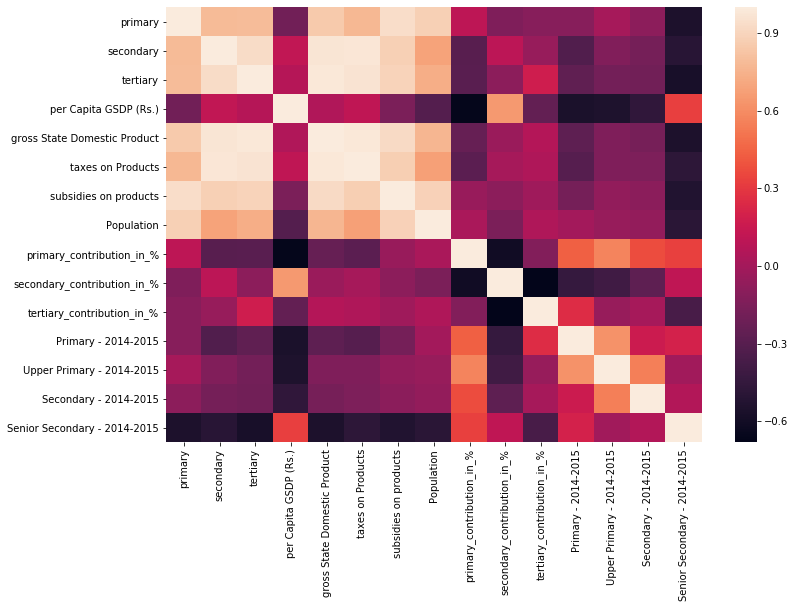

In [50]:
plt.rcParams["figure.figsize"] = [12,8]
sns.heatmap(DROPOUT_WITHSECTORS.corr())
plt.show()

##  Graph between dropout rate and the total GSDP

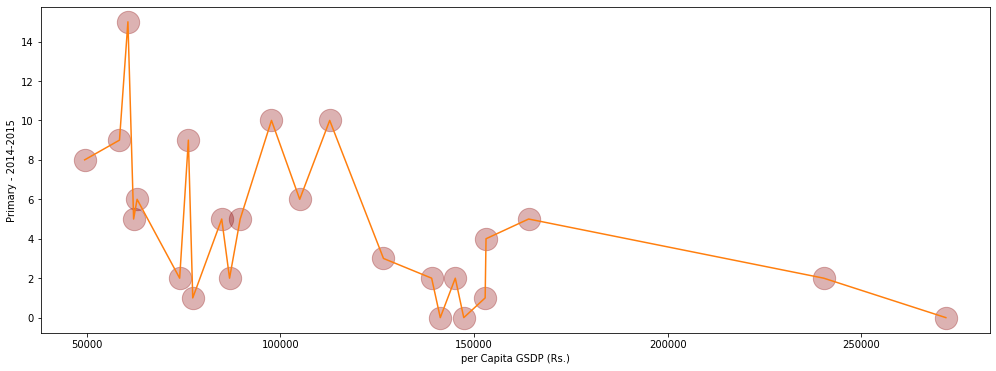

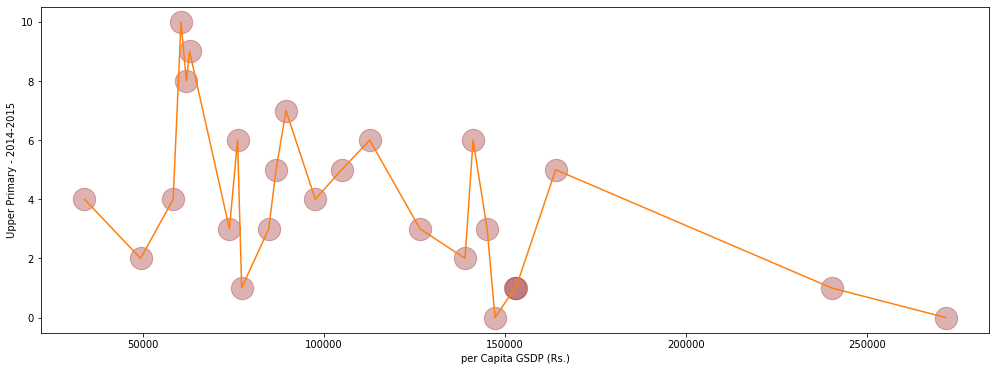

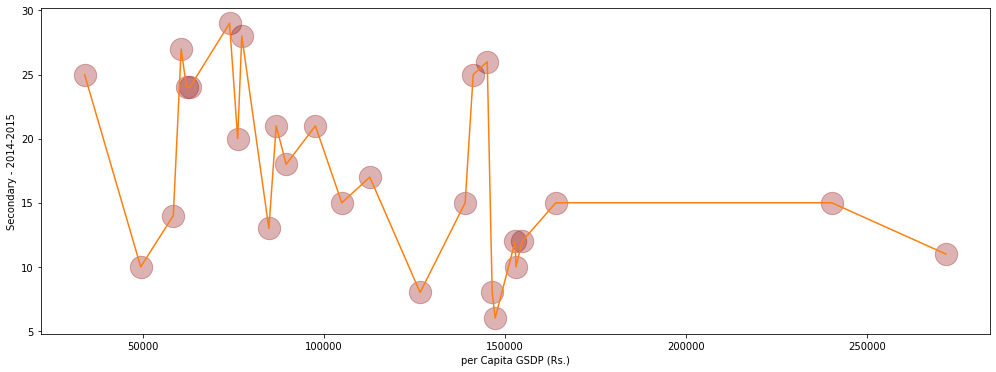

In [51]:
plt.rcParams["figure.figsize"] = [17,6]
list1=["Primary - 2014-2015",'Upper Primary - 2014-2015','Secondary - 2014-2015']
for x in list1:
    DF_A = DROPOUT_WITHSECTORS[['per Capita GSDP (Rs.)',x]]
    DF_A.dropna(inplace=True)
    DF_A['per Capita GSDP (Rs.)'] = DF_A['per Capita GSDP (Rs.)'].astype(int)
    DF_A[x] = DF_A[x].astype(int)
    sns.regplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x], fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":500} )
    sns.lineplot(x=DF_A['per Capita GSDP (Rs.)'],y=DF_A[x],dashes=False, markers=True)
    plt.show()   

## Q. Is there any correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP? 

#### Yes,there is correlation between dropout rate and %contribution of each sector (Primary, Secondary and Tertiary) to the total GDP,dropout rates are more below per capita GSDP (Rs.) ~ 150000 , this mostly because lack of money.

## Graph between dropout rates and population

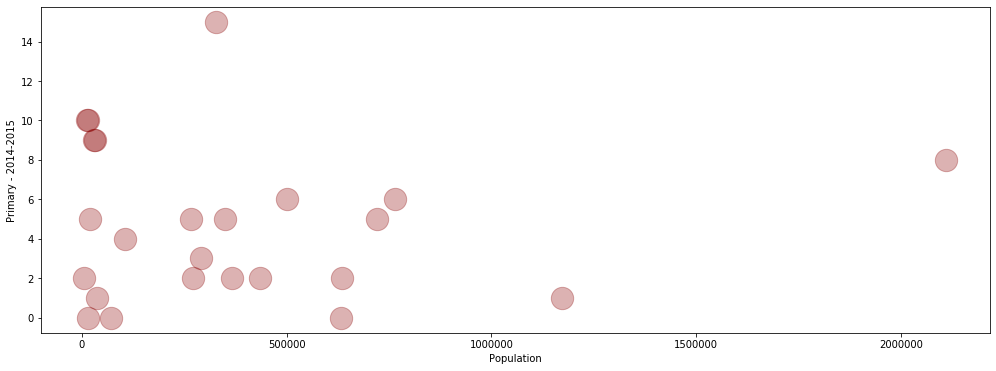

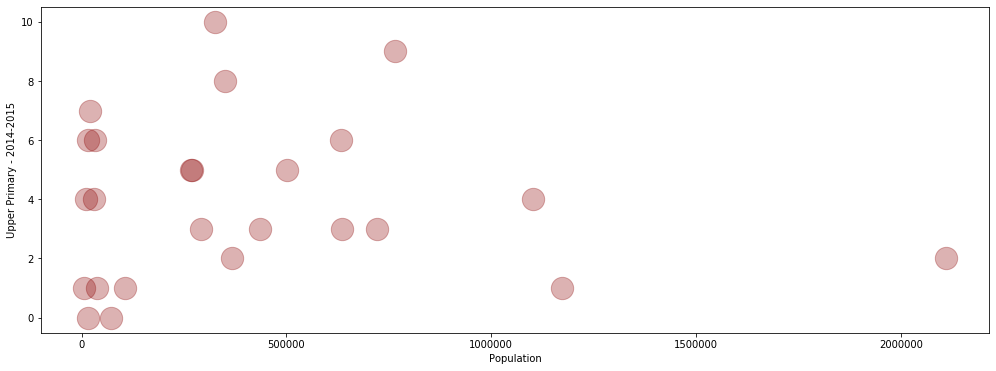

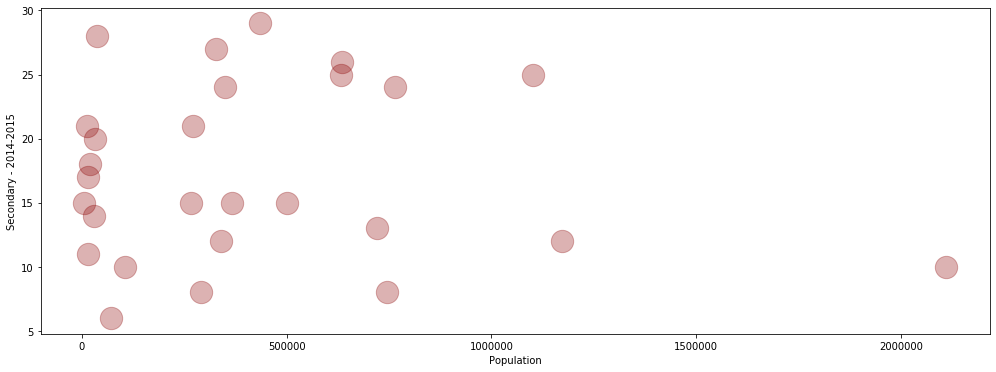

In [52]:
plt.rcParams["figure.figsize"] = [17,6]
list1=["Primary - 2014-2015",'Upper Primary - 2014-2015','Secondary - 2014-2015']
for x in list1:
    DF_A = DROPOUT_WITHSECTORS[['Population',x]]
    DF_A.dropna(inplace=True)
    DF_A['Population'] = DF_A['Population'].astype(int)
    DF_A[x] = DF_A[x].astype(int)
    sns.regplot(x=DF_A['Population'],y=DF_A[x], fit_reg=False,scatter_kws={"color":"darkred","alpha":0.3,"s":500} )
    #sns.lineplot(x=DF_A['Population'],y=DF_A[x],dashes=False, markers=True)
    plt.show()   

## Q.You have the total population of each state from the data in part I. Is there any correlation between dropout rates and population? What is the expected trend and what is the observation? 

#### Yes, there is a correlation between dropout rates and population.Drop rates(primary, upper primary and secondary ) are more where population is low.

## Q. Form at least one reasonable hypothesis for the observations from the data? 

#### People are not opting to study further because of lack of money. People are not getting good infrastructure to study further. In most of the cases people join the primary sector industries such as agriculture and leave education behind. Most of the people population are lying below per capita GSDP (Rs.) ~ 150000 which is highly related to the drop out rate. According to me  government should focus on the cost of education and infrastructure in order to bring down the drop out rate.


## INSIGHTS :

If we observe graphs properly most of our population in each sector of economy are not opting for the education further this is because large amount of population are not having adequate amount of money to spend on education.Due to this reason these people are less skilled and hence work in primary sector.But on other hand middle class people have skilled and they are contributing by giving more tax by working in tertiarry sectors. Government should take education seriously, should provide fund for education for more people, should provide better facilities to the primary sector so that people can earn more and can educate their children more. Drop out rate should be decreased.